## Dataset loading

This class uses information of people collaborating in organization X.
It was collected through a survey who says they are collaborating with who, thus it is _directed_ network.
It is stored in matrix format (not as edgelist like previous chapter).

In [1]:
import networkx as nx
import numpy as np
import matplotlib

## note: this is a bit weird way of transforming the data to suitable format
data = open('data/org_x_collaboration.csv', 'r')
data = data.read().strip()
data = data.replace('\n', ';')    
data = np.matrix( data )

network  = nx.from_numpy_array( data, create_using=nx.DiGraph)

## Plotting the network

Note that `networkx` recommends plotting the networks with [other tools](https://networkx.org/documentation/stable/reference/drawing.html). 

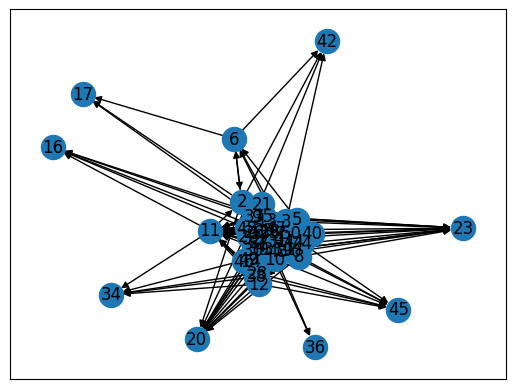

In [2]:
nx.draw_networkx( network )

## Modifying attributes

See the [documentation](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) for full list of attributes you may plot for vertex and edge parameters.

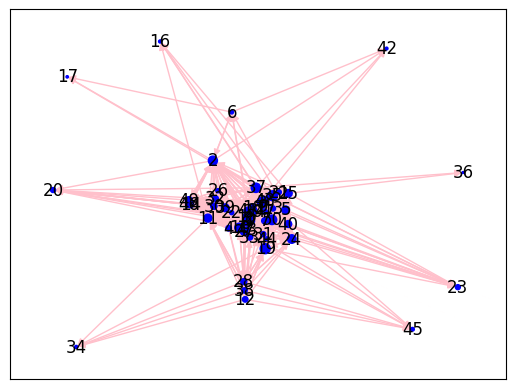

In [3]:
nx.draw_networkx( network, node_color = "blue", node_size = list( map( lambda x: x[1], nx.degree( network ) ) ), edge_color = "pink" )

# list( map( lambda x: x[1], nx.degree( network ) ) ) is a complex way to say: list of degree values for each node

### Task

* Modify the plot above so that it is ready for presentation in Organization X staff meeting.
 * Remove labels (set labels as empty)
 * Do something with the node sizes
 * Choose colors which are nicer
 * Use at least one vertex and one edge parameter not used in the example above. See the [documentation](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) for ideas both for vertex and edge.
 
### Real attributes

Above we only used attributes which could be detected from the network, such as `degree`.
However, these people have other attributes as well, such as if they are male or female.
(We do not have this data, but we shall fake it.)

In [4]:
## generating gender attribute, that is, choose 0 or 1 to all vertex
import random
import collections

gender = random.choices( [0, 1], k = 51 )
collections.Counter( gender )

Counter({1: 29, 0: 22})

## Task

* Generate at least one more such attribute for vertex and one for edges, use the code above.
* Use the new attributes to draw more visualizations from the data to explore if your attributes impact how the network is formed.

In [5]:
gender_color = map( lambda x: 'green' if x == 1 else 'yellow', gender ) ## generating a list with real color names

## Layout algorithms

There are several ways to layout the network.
See the [documentation](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout) for various options.
Try different layouts and explore if you can communicate that

* Organization X is in crisis due to the two genders not mixing in sufficiently.

Change node sizes, colors etc. to help you communicate this result.

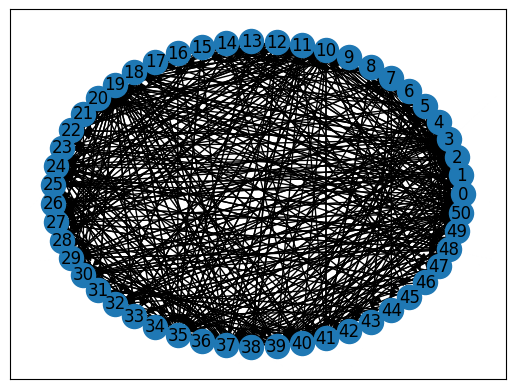

In [6]:
nx.draw_networkx( network, pos = nx.circular_layout( network ) )